# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963115  41571.195697          5.095287  7.410195e+05
std    281.891232     2.818742  24390.995134          0.446224  3.673234e+05
min      1.000000  2011.000000   1117.000000          4.000000  1.880000e+05
25%    244.750000  2015.000000  22676.750000          5.000000  4.757500e+05
50%    488.500000  2017.000000  37570.500000          5.000000  6.665000e+05
75%    732.250000  2019.000000  57421.250000          5.000000  8.830000e+05
max    976.000000  2022.000000  99495.000000          8.000000  2.941000e+06


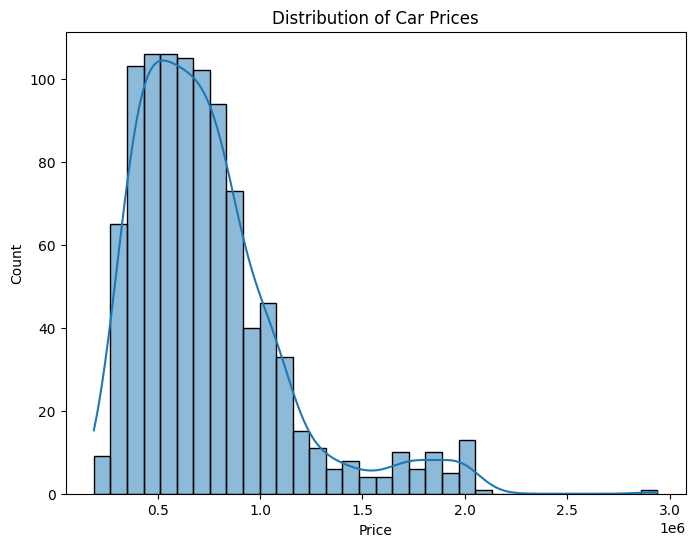

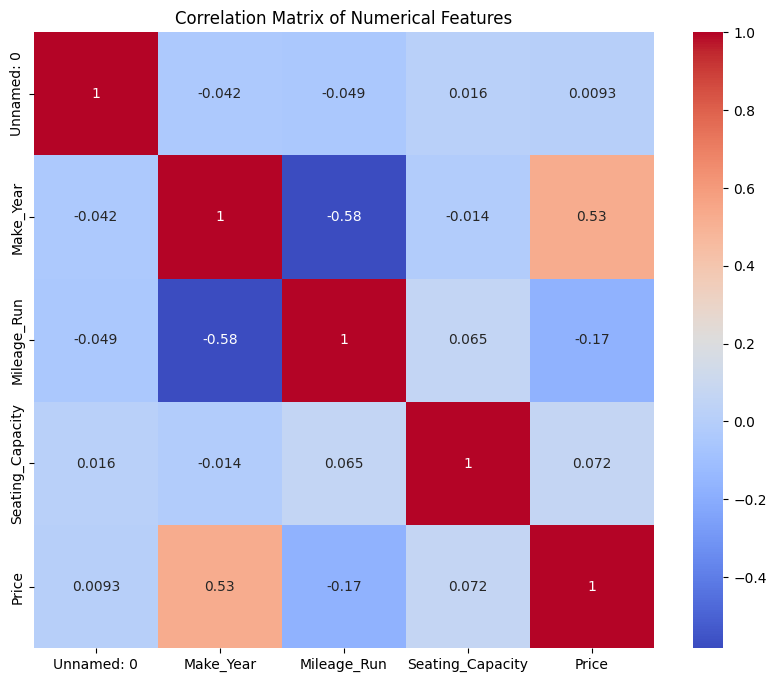

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('cars_hw.csv')

print(df.isnull().sum())

print(df.describe())

plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [4]:
categorical_features = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df_encoded = pd.get_dummies(df, columns=categorical_features)

numerical_features = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [6]:
X = df_encoded.drop(['Price', 'Unnamed: 0'], axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [7]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return train_rmse, test_rmse, train_r2, test_r2

model1 = LinearRegression()
results1 = evaluate_model(model1, X_train, X_test, y_train, y_test)

X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]
model2 = LinearRegression()
results2 = evaluate_model(model2, X_train_num, X_test_num, y_train, y_test)

print("Model 1 (All features):")
print(f"Train RMSE: {results1[0]:.2f}, Test RMSE: {results1[1]:.2f}")
print(f"Train R2: {results1[2]:.4f}, Test R2: {results1[3]:.4f}")

print("\nModel 2 (Numerical features only):")
print(f"Train RMSE: {results2[0]:.2f}, Test RMSE: {results2[1]:.2f}")
print(f"Train R2: {results2[2]:.4f}, Test R2: {results2[3]:.4f}")

Model 1 (All features):
Train RMSE: 157792.00, Test RMSE: 172221.56
Train R2: 0.8144, Test R2: 0.7840

Model 2 (Numerical features only):
Train RMSE: 304500.21, Test RMSE: 304548.97
Train R2: 0.3087, Test R2: 0.3245


Model 1, which includes all features, performs significantly better than Model 2, which only uses numerical features. Model 1 has lower RMSE values and higher R² values on both training and test sets, indicating it explains more of the variance in car prices

In [8]:
X_train['Year_Mileage'] = X_train['Make_Year'] * X_train['Mileage_Run']
X_test['Year_Mileage'] = X_test['Make_Year'] * X_test['Mileage_Run']

X_train['Mileage_Squared'] = X_train['Mileage_Run'] ** 2
X_test['Mileage_Squared'] = X_test['Mileage_Run'] ** 2

complex_model = LinearRegression()
results_complex = evaluate_model(complex_model, X_train, X_test, y_train, y_test)

print("Complex Model:")
print(f"Train RMSE: {results_complex[0]:.2f}, Test RMSE: {results_complex[1]:.2f}")
print(f"Train R2: {results_complex[2]:.4f}, Test R2: {results_complex[3]:.4f}")

Complex Model:
Train RMSE: 143669.56, Test RMSE: 134892.79
Train R2: 0.8461, Test R2: 0.8675


Compared to the simpler models, the complex model shows improved performance:
* Lower RMSE: The complex model has lower RMSE values on both training and test sets compared to Model 1, indicating better prediction accuracy2.
* Higher R²: The complex model has higher R² values, explaining more of the variance in car prices (84.61% for training and 86.75% for test data)2.
* Better generalization: The complex model's test performance is slightly better than its training performance, suggesting good generalization without overfitting

## Question 6:
In summarizing the results, it is evident that including all features significantly enhances model performance compared to using only numerical variables, as seen in the stark differences between Model 1 and Model 2. The complex model, which incorporated interactions and transformations, not only improved predictive accuracy but also demonstrated better generalization, as indicated by its lower RMSE and higher R² values on the test set. This suggests that the relationships between features and car prices are more intricate than simple linear models can capture. Additionally, the analysis highlights the importance of feature engineering in enhancing model performance. Overall, these findings underscore the critical balance between model complexity and generalization, illustrating how thoughtful feature selection and transformation can lead to more accurate hedonic pricing models.

In [11]:
lasso = Lasso(alpha=0.1, random_state=100)
lasso.fit(X_train, y_train)

selected_features = X_train.columns[abs(lasso.coef_) > 0]

print("Selected features by Lasso:")
print(selected_features)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso Train RMSE: {train_rmse_lasso:.2f}, Test RMSE: {test_rmse_lasso:.2f}")
print(f"Lasso Train R2: {train_r2_lasso:.4f}, Test R2: {test_r2_lasso:.4f}")

Selected features by Lasso:
Index(['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Make_Chevrolet',
       'Make_Datsun', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Jeep',
       'Make_Kia', 'Make_MG Motors', 'Make_Mahindra', 'Make_Maruti Suzuki',
       'Make_Nissan', 'Make_Renault', 'Make_Skoda', 'Make_Tata', 'Make_Toyota',
       'Make_Volkswagen', 'Color_beige', 'Color_black', 'Color_blue',
       'Color_bronze', 'Color_brown', 'Color_golden', 'Color_green',
       'Color_grey', 'Color_maroon', 'Color_orange', 'Color_purple',
       'Color_red', 'Color_silver', 'Color_white', 'Color_yellow',
       'Body_Type_crossover', 'Body_Type_hatchback', 'Body_Type_muv',
       'Body_Type_sedan', 'Body_Type_suv', 'No_of_Owners_1st',
       'No_of_Owners_2nd', 'No_of_Owners_3rd', 'Fuel_Type_diesel',
       'Fuel_Type_petrol', 'Fuel_Type_petrol+cng', 'Transmission_4-Speed',
       'Transmission_5-Speed', 'Transmission_6-Speed', 'Transmission_7-Speed',
       'Transmission_CVT', 'Transmis

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.735e+11, tolerance: 1.046e+10
  model = cd_fast.enet_coordinate_descent(
